In [ ]:
# Project Description :# In this particular project, we are using the insurance.csv dataset that contains 
# information like age, sex, bmi, children, smoker, region, charges etc. and using 
# that to predict insurance charges.

# However, before you go ahead and make a prediction, it is advised that you first 
# pre-process the data, since it may contain some irregularities and noise. 
# In addition, try various tricks and techniques in order to gain the best accuracy 
# in your predictions.

In [ ]:
#Data Exploration and data pre-processing

In [1]:
#importing the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#loading the data 
df=pd.read_csv(r"C:\Users\Siddaraju\Desktop\Fingertips-MDS-Report\Machine Learning\Projects-ML\Insurance_Linear_Regres .csv")

In [3]:
df.head() # Printing the first five rows of a data set

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Checking for null values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#printing the statistical info regarding the numerical present in the data set
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape # print the number of columns and rows

(1338, 7)

In [8]:
#Converting the categorical columns into numeric using get dummies method
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
#Encoding the data  using get_dummies method 
df=pd.get_dummies(df,drop_first=True)

In [14]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [17]:
#Scalin the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_ss=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
#df_ss=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_ss.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


In [18]:
#Separate feature data from target data
X=df_ss.drop("charges",axis=1)
y=df_ss["charges"]

In [21]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418


In [22]:
y.head() # target column

0    0.298584
1   -0.953689
2   -0.728675
3    0.719843
4   -0.776802
Name: charges, dtype: float64

In [24]:
#splittig the data set

#random_state Controls the shuffling applied to the data before applying the split.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [25]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
428,-1.296362,-2.271753,-0.078767,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
226,-0.797954,1.213372,-0.908614,0.989591,-0.507463,-0.566418,1.635795,-0.566418
867,1.266881,2.138583,-0.078767,0.989591,-0.507463,-0.566418,-0.611324,1.765481
397,-1.296362,0.058499,-0.908614,0.989591,-0.507463,-0.566418,1.635795,-0.566418
300,-0.228344,-0.510736,1.580926,0.989591,-0.507463,-0.566418,-0.611324,-0.566418


In [27]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
7,-0.157143,-0.479567,1.580926,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
999,-0.228344,-0.619825,-0.908614,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
1209,1.409283,1.055889,-0.078767,0.989591,-0.507463,-0.566418,-0.611324,1.765481
491,1.551686,-0.915925,-0.908614,-1.010519,-0.507463,-0.566418,1.635795,-0.566418
625,-0.726752,-0.760083,-0.908614,-1.010519,-0.507463,1.765481,-0.611324,-0.566418


In [32]:
Y_train.head()

428   -0.834578
226   -0.874061
867   -0.139961
397    0.273932
300   -0.538903
Name: charges, dtype: float64

In [33]:
Y_test.head()

7      -0.494728
999    -0.661073
1209   -0.076267
491     0.928725
625    -0.787573
Name: charges, dtype: float64

In [35]:
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
mod.fit(X_train,Y_train)


LinearRegression()

In [36]:
y_pred=mod.predict(X_test)

In [40]:
y_pred

array([-0.38061502, -0.57898779,  0.17024554, -0.16285157, -0.75719832,
       -0.30505974, -0.30603677,  1.04407627, -0.46659347,  1.47119146,
       -0.91917646, -0.76642622, -0.49307594, -0.16065202, -0.03025481,
       -0.13127078, -0.65277781,  0.43601654, -0.20314682,  1.46879003,
        1.73877203, -0.71970173, -1.01225961, -0.49451245, -0.74727777,
        0.05332505, -0.10914873, -0.18355435, -0.56422753,  1.49036435,
       -1.24946757,  1.73881062, -0.32547605, -0.4796005 , -0.44792272,
       -0.11786973,  0.05879913, -0.04585242, -0.27846155, -0.38311529,
        0.21359771, -0.23530587, -0.60850274, -0.15292957, -0.67862173,
       -0.49921286, -0.54749091,  1.7581233 , -0.17849888, -0.17369215,
        1.62155554, -0.66234441, -0.23390784,  0.12519546, -0.1848206 ,
       -0.00253615, -0.08711102, -0.4642285 , -0.46033871,  1.81331217,
       -1.05939619,  1.68493253,  2.026777  , -0.9944752 ,  1.26628048,
       -0.27860468, -0.57406549, -0.28581072, -0.40804136, -0.43

C:\Users\Siddaraju\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

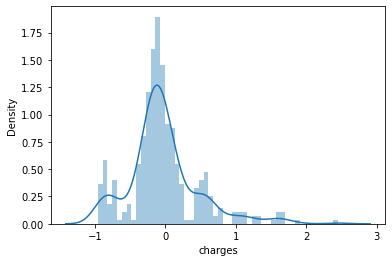

In [42]:
sns.distplot((Y_test,y_pred),bins=50)

In [43]:
#Model Evaluation
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [45]:
#mean_squared_error
print(mean_squared_error(Y_test,y_pred))


0.251121967795223


In [46]:
#mean_absolute_error
print(mean_absolute_error(Y_test,y_pred))


0.34915145264750763


In [47]:
#R2 score
print(r2_score(Y_test,y_pred))

0.7166124432331722
